In [58]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
import seaborn as sns

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

In [43]:
# data acrosss four models
dp = os.path.join(rf, "data", "four_models")
data = pd.DataFrame()
for f in os.listdir(dp):
    data = pd.concat([data, pd.read_csv(os.path.join(dp, f))])

In [44]:
#data = pd.read_csv(os.path.join(rf, "data", "model_comparison_iter2.csv"))
data=data.loc[data["algo"].isin(["COBYLA"]),:]

### Correctly identified model


correct_AIC     0.668229
correct_AICc    0.667188
correct_BIC     0.649479
dtype: float64


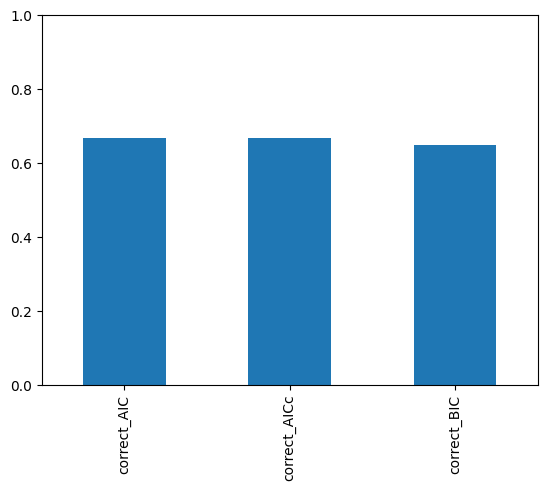

In [45]:
for ic in ["AIC", "AICc", "BIC"]: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())

<AxesSubplot: xlabel='true_model'>

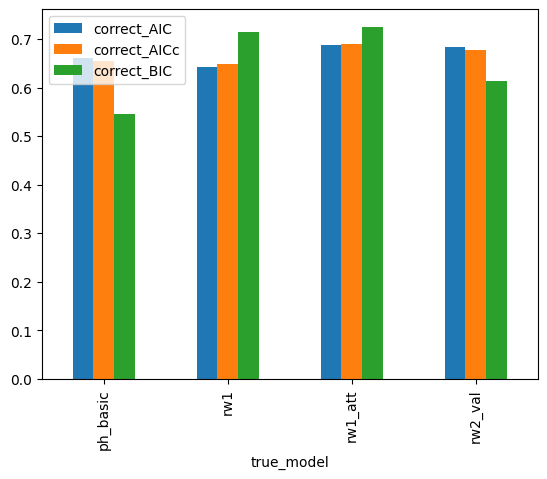

In [46]:
tdf = data.loc[:, ["true_model"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="true_model").mean().plot.bar()


<AxesSubplot: xlabel='noise'>

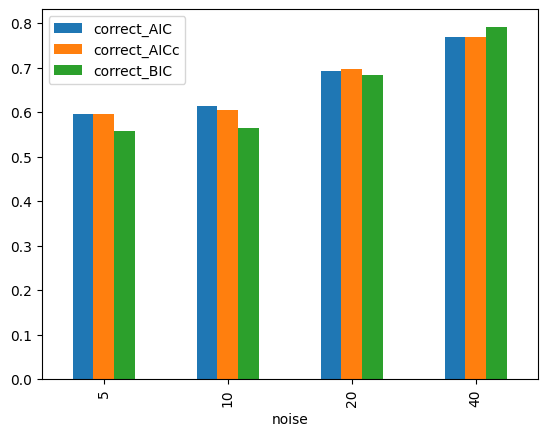

In [47]:
tdf = data.loc[:, ["noise"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="noise").mean().plot.bar()

<AxesSubplot: xlabel='cutoff'>

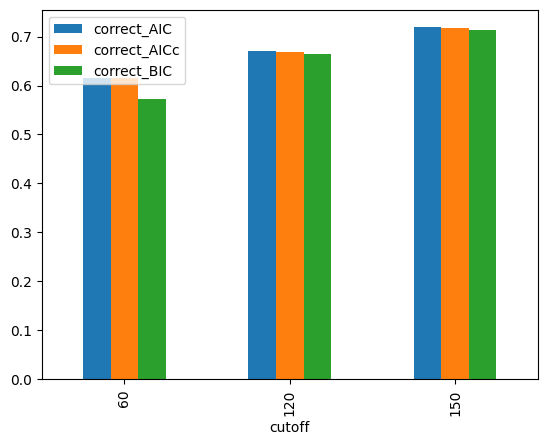

In [48]:
tdf = data.loc[:, ["cutoff"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="cutoff").mean().plot.bar()

### Mean error

mean_err_AIC     2.286981
mean_err_AICc    2.290233
mean_err_BIC     2.499378
dtype: float64


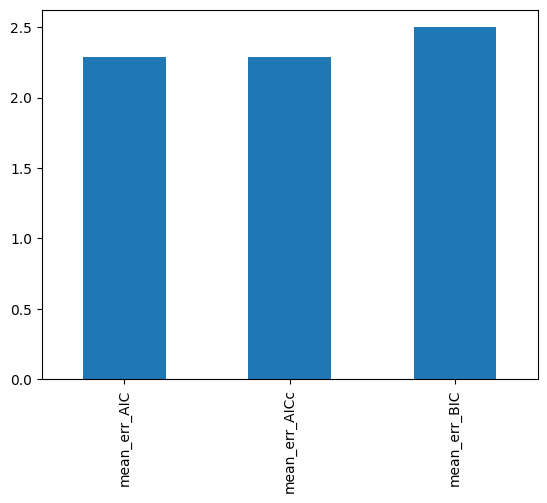

In [49]:

data.filter(regex='^mean_err_').median().plot.bar()
print(data.filter(regex='^mean_err_').median())

<AxesSubplot: xlabel='true_model'>

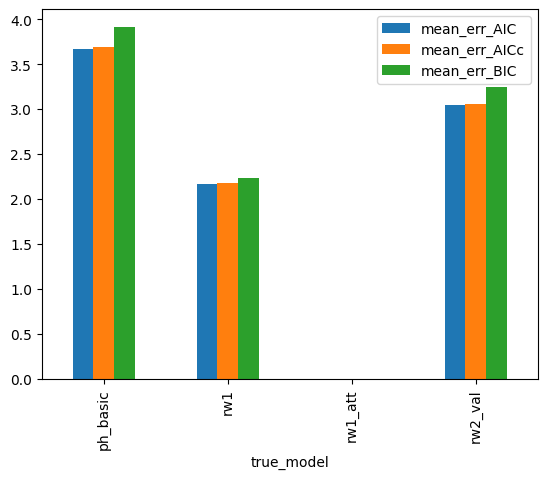

In [50]:
tdf = data.loc[:, ["true_model"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="true_model").mean().plot.bar()

<AxesSubplot: xlabel='noise'>

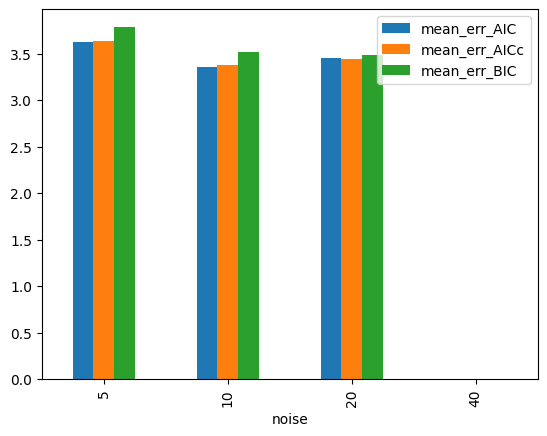

In [51]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="noise").mean().plot.bar()

In [75]:
tdf = data.loc[:, ["cutoff"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]

#tdf.groupby(by="cutoff").mean().plot.bar()
bdf = tdf.melt(id_vars=["cutoff"], value_vars=["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]], var_name="IC", value_name="score")
bdf = bdf.loc[~np.isinf(bdf["score"]),:]
bdf=bdf.dropna()
bdf["score"] = bdf["score"].astype(float)
f, ax = plt.subplots(1,1,figsize=(12,3))       
sns.swarmplot(data=bdf, x="IC", y="score", hue="cutoff", ax=ax)
#bdf["score"].hist()

/home/ondrej/anaconda3/envs/python3.10/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 97.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 